In [5]:
#write script to cut video into tiles
import os

In [6]:
W, H = 3840, 2048
dtile = 192

In [7]:
tile_list =[(i, j) for i in range(0, W, dtile) for j in range(0, H, dtile)]
len(tile_list)

220

# Create tiles for all video segment of a video


### Step 1: create sh script to generate tiles from segments

In [23]:
#vidpath_template = "./segment_vids/paris_8_1.mp4"
vidname='ride'
duration  =2#seconds
t_start   = 8
t_end     = 60
for seg_idx in range(t_start, t_end, duration):
    with open(f'./create_all_tile_vidseg{seg_idx}.sh', 'w') as file:
        for i, j in tile_list:
            cmd = f"./create_tile_vid.sh ./segment_vids/{vidname}_{seg_idx:02d}_{duration}.mp4 192 192 {i} {j}"
            file.write(cmd + '\n')
    file.close()
    os.system(f'chmod u+x ./create_all_tile_vidseg{seg_idx}.sh')

In [24]:
with open(f'./create_all_tile_vid.sh', 'w') as file:
    for i in range(t_start, t_end, duration):
        cmd = f"./create_all_tile_vidseg{i}.sh"
        file.write(cmd + '\n')
    file.write('rm ./create_all_tile_vidseg*.sh')
    file.close()
    os.system(f'chmod u+x ./create_all_tile_vid.sh')

### Step 2: go to terminal and execute the create_all_tile_vid.sh file

In [ ]:
./create_all_tile_vid.sh

### Step 3: copy the video directory containing all tiles, to vr-streaming-gan project folder

In [ ]:
cp -r ./<video_name> ../vr-streaming-gan/datasets/tile-vids/

In [22]:
haha=2
f'{haha:02d}'

'02'

In [45]:
#clean the target directory, dangeroush command, should manually execute it
#cmd = "rm -r ./tiles/JPEGImages/*"
#os.system(cmd)

# Create zip file for individual frames

In [29]:
vidpath_template = "./segment_vids/paris_8_1.mp4"
with open('create_all_tile_data.sh', 'w') as file:
    for i, j in tile_list:
        cmd = f"./create_tile_data.sh ./segment_vids/paris_8_1.mp4 192 192 {i} {j}"
        file.write(cmd + '\n')
file.close
os.system('chmod u+x ./create_all_tile_data.sh')

0

In [26]:
#NOTE: if notebook cannot execute create_all_tile_data.sh, 
#    manually execute this file in the terminal
os.system('./create_all_tile_data.sh')

/bin/sh: 1: cmd: not found


# Create video segment from raw input vidoe

### Some how we cannot directly execute the command from jupyter, need to copy down to sh file and execute it

In [2]:
import os

In [3]:
cmd_template = './create_segment.sh ./vids/ride.mp4 00:00:{:02d} 00:00:02 ./segment_vids/ride_{:02d}_2.mp4'
for i in range(8, 60, 2):
    cmd = cmd_template.format(i, i)
    print (cmd)
    os.system(cmd)

./create_segment.sh ./vids/ride.mp4 00:00:08 00:00:02 ./segment_vids/ride_08_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:10 00:00:02 ./segment_vids/ride_10_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:12 00:00:02 ./segment_vids/ride_12_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:14 00:00:02 ./segment_vids/ride_14_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:16 00:00:02 ./segment_vids/ride_16_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:18 00:00:02 ./segment_vids/ride_18_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:20 00:00:02 ./segment_vids/ride_20_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:22 00:00:02 ./segment_vids/ride_22_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:24 00:00:02 ./segment_vids/ride_24_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:26 00:00:02 ./segment_vids/ride_26_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:28 00:00:02 ./segment_vids/ride_28_2.mp4
./create_segment.sh ./vids/ride.mp4 00:00:30 00:00:02 ./segment_vids/ride_30_2.mp4
./cr

In [39]:
% bash
cd segment_vids/
for file in ./*.mp4:
    dirname=${file//.mp4/}
    mkdir $dirname
    ffmpeg -i $file -r 1/1 ./$dirname/%05d.jpg

SyntaxError: invalid syntax (<ipython-input-39-385d0838743b>, line 2)

In [36]:
ls

create_all_tile_data.sh*  create_tile_data.sh*  paris_8_1.zip/  tiles/
create_segment.sh*        create_tile.sh        README.txt      tile_vids/
create_tile_data.ipynb    create_zip_item.sh*   segment_vids/   vids/


In [62]:
#test reading video
import torchvision as tv
import time
from PIL import Image
import numpy as np

import time

In [63]:
btime = time.time()
video_path = './tile_vids/paris_8_2/1152_0/192x192.mp4'
reader = tv.io.VideoReader(video_path, "video")
print (time.time() - btime)
btime = time.time()
dat = [Image.fromarray(np.array(frame['data']).transpose(1, 2, 0)) for frame in reader]
print (time.time() - btime)
btime = time.time()
dat = [np.array(frame['data']).transpose(1, 2, 0) for frame in reader]
print (time.time() - btime)

0.004076957702636719
0.03777956962585449
0.0010254383087158203


In [64]:
dat

[]

In [61]:
t.Tensor(dat)

tensor([])

In [56]:
import torch as t
t.nn.functional.interpolate(dat, 192)

AttributeError: 'list' object has no attribute 'dim'

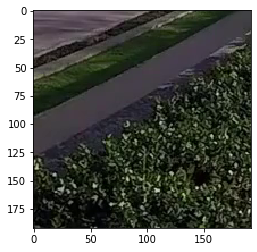

In [42]:
tmp = np.array(frame['data'], dtype=np.uint8)

from matplotlib import pyplot as plt

%matplotlib inline


plt.imshow(img)